# Decision Tree
Classificazione e predizione tramite un modello **Decision Tree**

In [5]:
import numpy as np
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings('ignore')

In [6]:
dataframe = pd.read_csv('../CSVfile/CSVfile_sintesi/main_dataframe.csv', index_col=0)

data = pd.read_csv('../CSVfile/CSVfile_sintesi/Clean_data/clean_dataframe.csv', index_col=0).to_numpy()

target = dataframe["('a', '', '')"].to_numpy()

## without pruning ($\alpha$ = 0)

In [7]:
np.random.seed(20)

pca = PCA(n_components = 30)
data = pca.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8)
print(X_train.shape)

(7296, 30)


In [8]:
#
# Creazione e training del modello 
#

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
training_ba = balanced_accuracy_score(y_train, y_predicted_train)
training_recall = recall_score(y_train, y_predicted_train, average=None)
training_precision = precision_score(y_train, y_predicted_train, average=None)
testing_acc = accuracy_score(y_test, y_predicted_test)
testing_ba = balanced_accuracy_score(y_test, y_predicted_test)
testing_recall = recall_score(y_test, y_predicted_test, average=None)
testing_precision = precision_score(y_test, y_predicted_test, average=None)

accuracy = pd.DataFrame(data={'ACC':[training_acc, testing_acc], 'BA':[training_ba, testing_ba]},\
                       index=['training', 'testing'])
print(accuracy)
print()
trr = pd.DataFrame(data=training_recall, index=list(range(1,20)), columns=['Training RECALL']).transpose()
trr.columns.name='Class'
print(trr)
print()
print()
trp = pd.DataFrame(data=training_precision, index=list(range(1,20)), columns=['Training PRECISION']).transpose()
trp.columns.name='Class'
print(trp)
print()
print()
ter = pd.DataFrame(data=testing_recall, index=list(range(1,20)), columns=['Testing RECALL']).transpose()
ter.columns.name='Class'
print(ter)
print()
print()
tep = pd.DataFrame(data=testing_precision, index=list(range(1,20)), columns=['Testing PRECISION']).transpose()
tep.columns.name='Class'
print(tep)
print()

               ACC        BA
training  1.000000  1.000000
testing   0.939145  0.939466

Class             1    2    3    4    5    6    7    8    9    10   11   12  \
Training RECALL  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

Class             13   14   15   16   17   18   19  
Training RECALL  1.0  1.0  1.0  1.0  1.0  1.0  1.0  


Class                1    2    3    4    5    6    7    8    9    10   11  \
Training PRECISION  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

Class                12   13   14   15   16   17   18   19  
Training PRECISION  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  


Class                 1    2         3    4         5         6         7   \
Testing RECALL  0.990741  1.0  0.990385  1.0  0.903226  0.824074  0.967033   

Class                 8         9         10       11     12        13  \
Testing RECALL  0.791209  0.894737  0.913978  0.84375  0.975  0.927835   

Class                 14        15        16        17    18

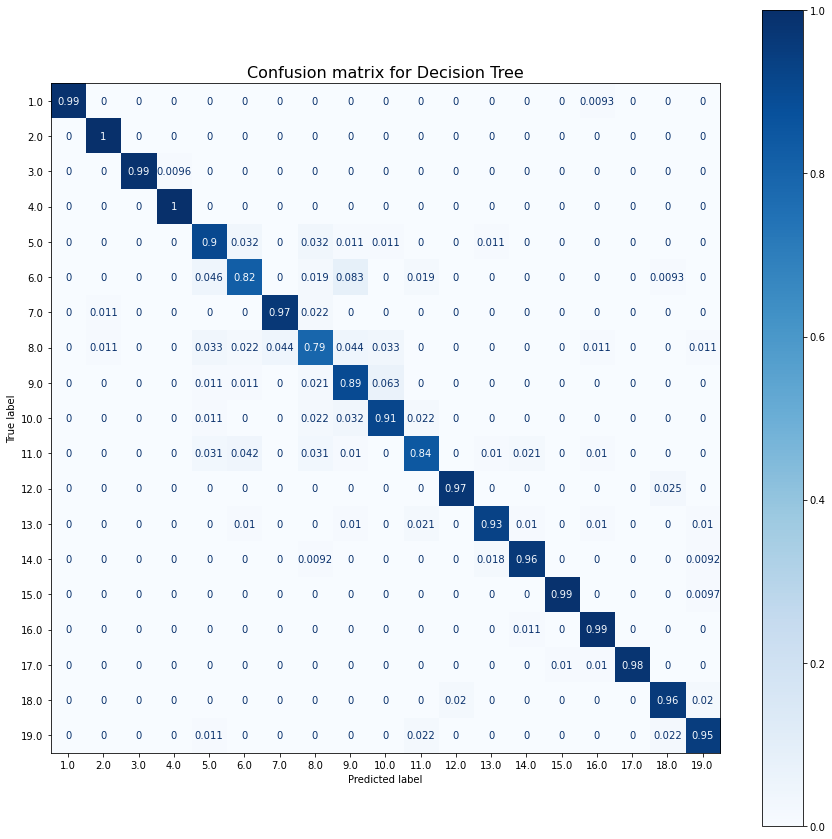

In [9]:
#
# Valutazione per mezzo di una matrice di confusione
#

plt.rcParams["figure.figsize"] = (15,15)
matrix = plot_confusion_matrix(tree_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

plt.title('Confusion matrix for Decision Tree', size=16)
plt.show(matrix)
plt.show()  

In [10]:
feat_names = dataframe.columns
targ_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9',\
              'class10', 'class11', 'class12', 'class13', 'class14', 'class15', 'class16', 'class17',\
             'class18', 'class19']

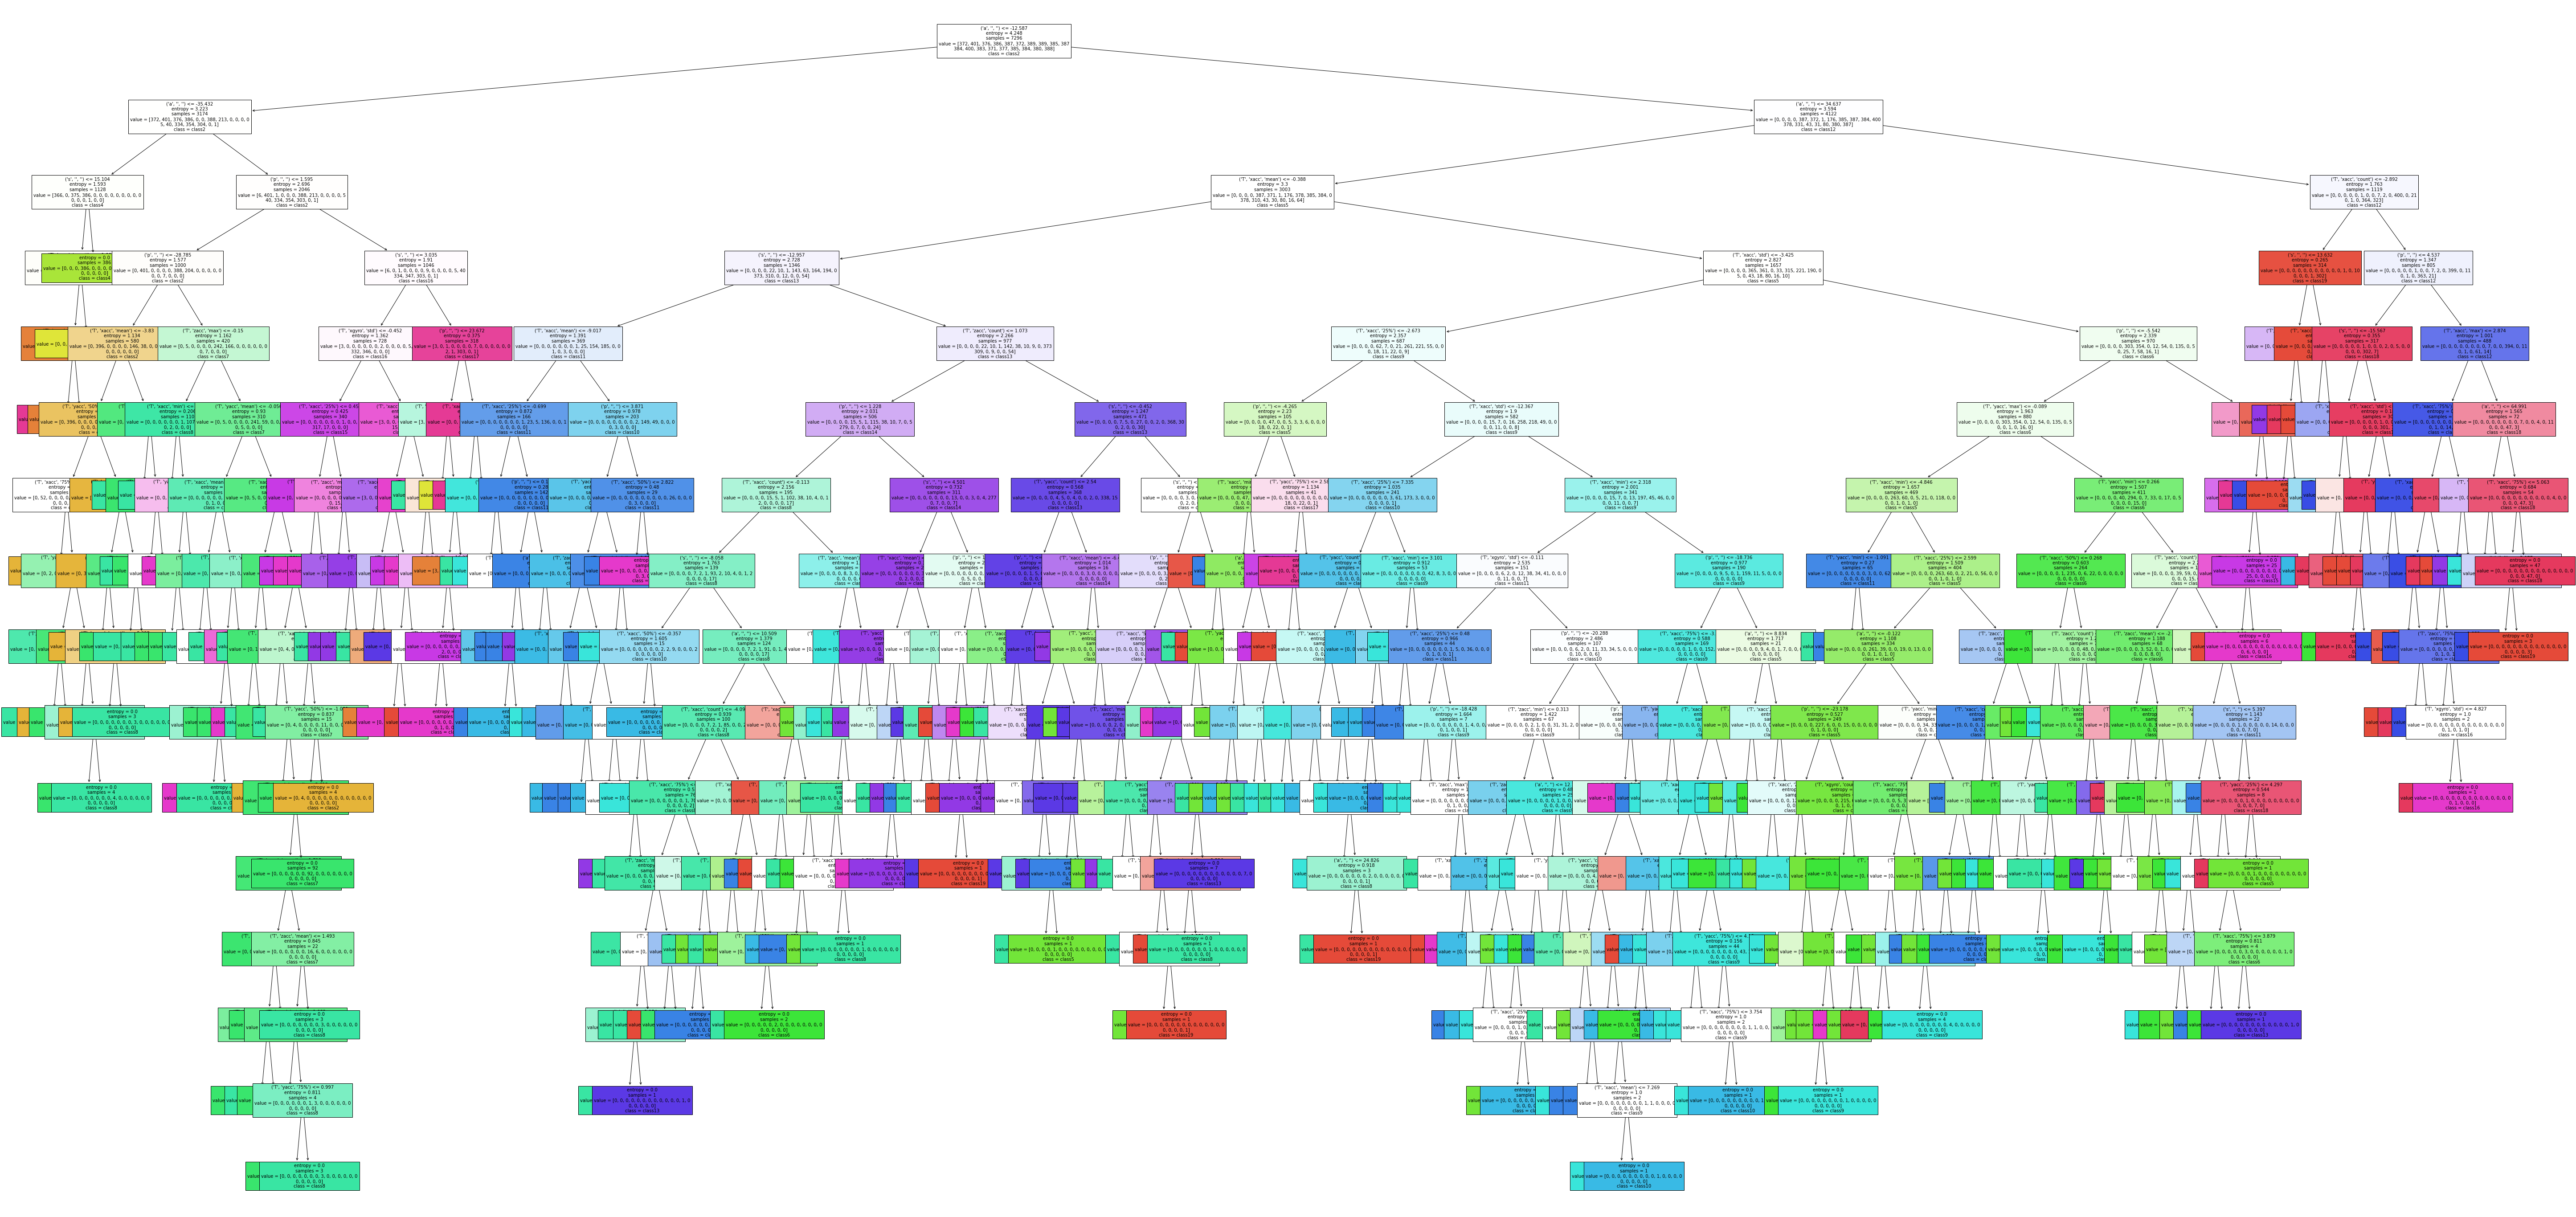

In [11]:
fig, ax = plt.subplots(figsize=(100, 50))
plot_tree(tree_model, ax=ax, fontsize=10,\
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

In [12]:
print("levels:", tree_model.get_depth())
print("leaves:", tree_model.get_n_leaves())

levels: 15
leaves: 301


Non avendo effettuato il _pruning_ l'accuracy è al 100% nel training set, nonostante questo l'accuracy del testing set rimane comunque molto alta (0.98)

-----
## With pruning ($\alpha$ = 0.1)
Scegliamo arbitrariamente $\alpha=0.1$.  
La funzione per calcolare il caso di arresto e _pruning_ è basata sulla formula dell'entropia:
$$\sum\limits_{p=1}^{|T|} \Big(-\sum\limits_{k=1,K}f_k \log(f_k) \Big)+ \alpha |T|$$

In [13]:
tree_model = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.1)
tree_model.fit(X_train, y_train)

y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\ntesting accuracy {testing_acc}')

training accuracy 0.5552357456140351
testing accuracy 0.5449561403508771


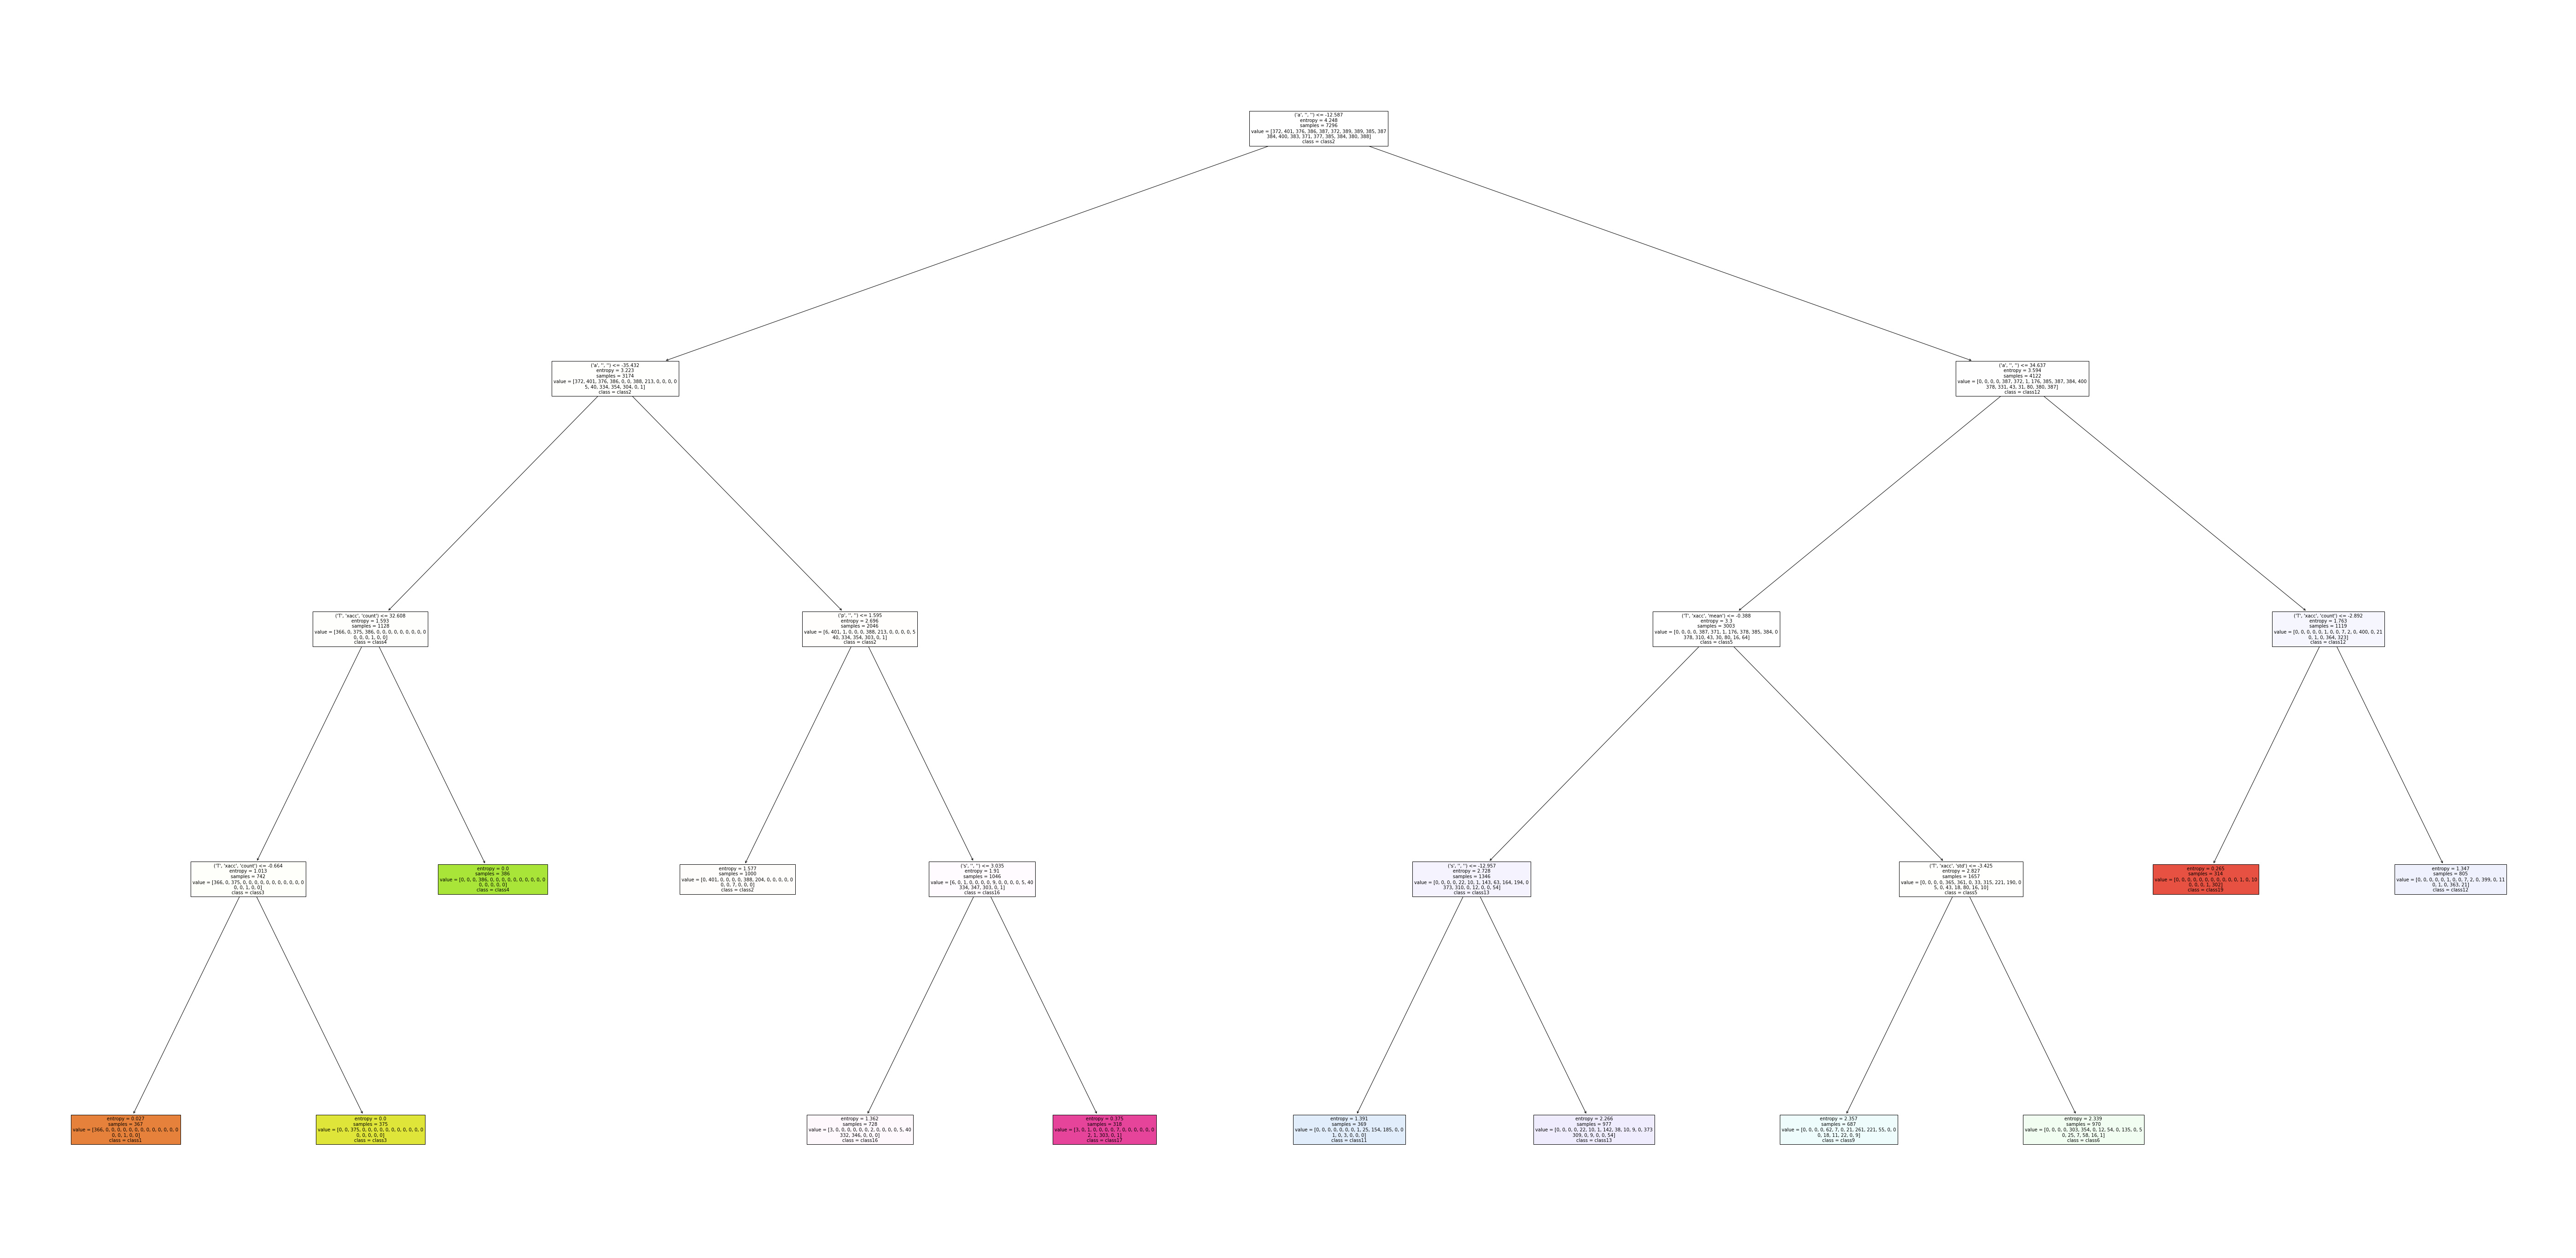

In [14]:
fig, ax = plt.subplots(figsize=(100, 50))
plot_tree(tree_model, ax=ax, fontsize=10,\
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

In [15]:
print("levels:", tree_model.get_depth())
print("leaves:", tree_model.get_n_leaves())

levels: 4
leaves: 12


Possiamo notare che l'albero è più piccolo, aumentando la leggibilità e la comprensione, a discapito però di una accuracy più bassa.

-----
## Compute best alpha
Utilizzando una _grid search_ e _5-fold cross-validation_

In [16]:
grid_of_values = {'ccp_alpha': np.arange(0, 20, 2)/1000}
grid_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_of_values, cv=5)  # 5-fold
grid_model.fit(X_train, y_train)

best_alpha = grid_model.best_params_['ccp_alpha']
print(f'best alpha {best_alpha}')

best alpha 0.0


L'$\alpha$ migliore è 0, quindi senza _pruning_, come mostrato all'inizio di questo notebook.

Per vedere come varia la precisione del modello, proviamo a plottare gli score risultanti al variare di alfa.

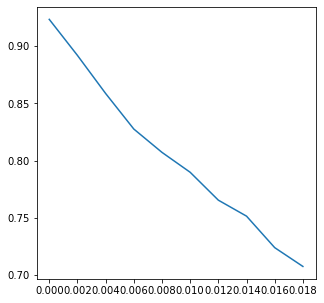

In [17]:
indx = [ e['ccp_alpha'] for e in grid_model.cv_results_['params'] ]
col = grid_model.cv_results_['mean_test_score']

plt.rcParams["figure.figsize"] = (5,5)

score_data = pd.DataFrame(col, columns=['score'], index=indx)
plt.plot(score_data)
plt.xticks(indx)
plt.show()